In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [8]:
df=pd.read_csv('covid-19(India).csv')
#df['Date']=pd.to_datetime(df.Date)
#df.sort_values(by='Date')
data=df.groupby(['Date'], sort=False)['Infected'].agg(np.sum).reset_index()
data['confirmed']=data['Infected'].cumsum()
data

,Date,Infected,confirmed
0,03-02-2020,3,3
1,02-03-2020,2,5
2,03-03-2020,2,7
3,04-03-2020,20,27
4,05-03-2020,1,28
...,...,...,...
70,13-05-2020,3485,78004
71,14-05-2020,4288,82292
72,15-05-2020,3449,85741
73,16-05-2020,4819,90560


In [9]:
data['days']=np.arange(0, len(data), 1)
data=data[['days', 'confirmed']]
data

,days,confirmed
0,0,3
1,1,5
2,2,7
3,3,27
4,4,28
...,...,...
70,70,78004
71,71,82292
72,72,85741
73,73,90560


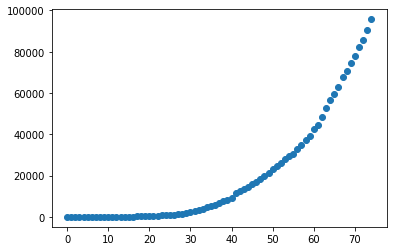

In [10]:

plt.scatter(data['days'], data['confirmed'])


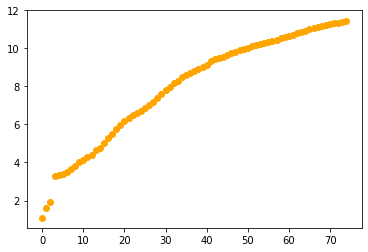

In [11]:
plt.scatter(data['days'], np.log(data['confirmed']), color='orange')

In [12]:
X, Y=np.array(data['days']).reshape(-1, 1), np.array(np.log(data['confirmed'])).reshape(-1, 1)
reg=LinearRegression()
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

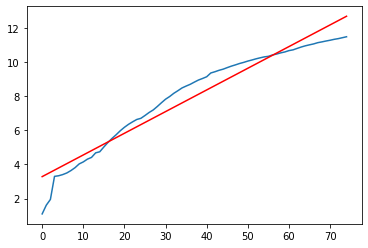

In [13]:
plt.plot(X, Y)
Y_pred=reg.predict(X)
prediction_space= ([min(X), max(X)])
plt.plot(prediction_space, [min(Y_pred), max(Y_pred)], color='red')

m=(max(Y_pred)-min(Y_pred))/(max(X)-min(X))

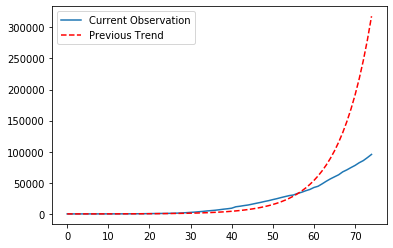

In [14]:
plt.plot(data['days'], data['confirmed'], label='Current Observation')
Y_pred=np.exp(reg.predict(X))
plt.plot(X, Y_pred, color='red', linestyle='dashed', label='Previous Trend')
plt.legend()

In [15]:
test=np.arange(len(data), len(data)+21, 1)
reg.score(X, Y)

0.9408594021605488

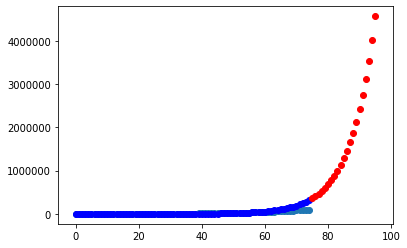

In [16]:
plt.scatter(data['days'], data['confirmed'])
Y_pred=np.exp(reg.predict(X))
plt.scatter(X, Y_pred, color='blue')
plt.scatter(test, np.exp(reg.predict(test.reshape(-1, 1))), color='red')

In [17]:
future=np.arange(len(data), len(data)+21, 1)
predictions=np.exp(reg.predict(future.reshape(-1, 1)))
future, predictions

(array([75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91,
        92, 93, 94, 95]),
 array([[ 360834.66307206],
        [ 409640.31172925],
        [ 465047.29774291],
        [ 527948.50249241],
        [ 599357.57639446],
        [ 680425.27383928],
        [ 772457.99755196],
        [ 876938.85122046],
        [ 995551.53965266],
        [1130207.50161246],
        [1283076.71257958],
        [1456622.65381825],
        [1653642.01127991],
        [1877309.74408631],
        [2131230.24886966],
        [2419495.44448122],
        [2746750.71310111],
        [3118269.76038764],
        [3540039.60103462],
        [4018857.03927535],
        [4562438.19911298]]))

In [18]:
dt=df.groupby(['Date'], sort=False)['Infected'].agg(np.sum).reset_index()
dt['confirmed']=dt['Infected'].cumsum()
#dt=dt.iloc[4:]
dt

,Date,Infected,confirmed
0,03-02-2020,3,3
1,02-03-2020,2,5
2,03-03-2020,2,7
3,04-03-2020,20,27
4,05-03-2020,1,28
...,...,...,...
70,13-05-2020,3485,78004
71,14-05-2020,4288,82292
72,15-05-2020,3449,85741
73,16-05-2020,4819,90560


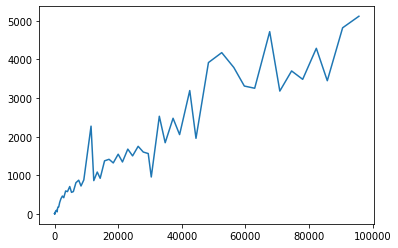

In [19]:
plt.plot(dt['confirmed'],dt['Infected'])

In [20]:
m

array([0.12685963])

In [21]:
1.0+m*14+m**2*24

array([3.16227559])